<strong>Algorithm that 'memorizes' users' faces and shows the ID of the user to whom the test photo belongs.</strong>

<h1>Importing the necessary libraries</h1>

In [13]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2
import os

<h1>Image pre-processing</h1>

In [14]:
def data_images():
    paths = [os.path.join('train', f) for f in os.listdir('train')]
    faces = []
    ids = []
    
    for path in paths:
        image = Image.open(path).convert('L')
        image_numpy = np.array(image, 'uint8')
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        ids.append(id)
        faces.append(image_numpy)
    
    return np.array(ids), faces

In [15]:
ids, faces = data_images()

In [16]:
faces[0]

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 252, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [17]:
ids[0]

1

<h1>Model training</h1>

In [18]:
lbph = cv2.face_LBPHFaceRecognizer.create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

<h1>Classification</h1>

In [19]:
recognizer = cv2.face_LBPHFaceRecognizer.create()
recognizer.read('classificadorLBPH.yml')

In [20]:
image_test = 'subject10.sad.gif'

In [21]:
image = Image.open(image_test).convert('L')
image_np = np.array(image, 'uint8')
print(image_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [22]:
predicted_id, _ = recognizer.predict(image_np)
predicted_id

10

In [23]:
correct_id = int(os.path.split(image_test)[1].split('.')[0].replace('subject', ''))
correct_id

10

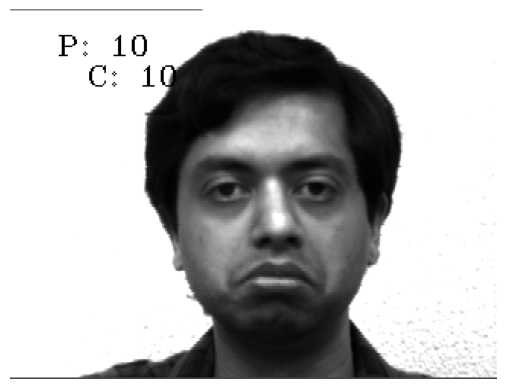

In [24]:
x = 0
y = 0

cv2.putText(image_np, 'P: ' + str(predicted_id), (x + 30, y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'C: ' + str(correct_id), (x + 50, y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
50
plt.imshow(image_np, cmap='gray')
plt.axis('off')
plt.show()